In [2]:
from pathlib import Path

import pandas as pd
import RNA
from Bio.Data import CodonTable
from Bio.Data.IUPACData import protein_letters_1to3_extended as aa_1to3

from src.extract_ss_text_file import extract_ss_text_file
from src.extract_tRNAscan_file import extract_tRNAscan_file
from src.trna_struct import (
    check_struc_abs,
    count_stems,
    find_loop_dots,
    struct_abstractor,
    check_struc_abs_viennarna
)

# Section 1 | Best tRNA candidates

## Load data into data frame

In [3]:
ss_df = extract_ss_text_file("./tRNAscan_se_results")

In [4]:
# Show head
ss_df

,superphyla,id,name,type,anticodon,seq,length,possible_intron_n,possible_intron_rel,possible_intron_abs,dot_bracket_sec_str
0,Asgard,3045163_7,JASEJC010000001.trna1,Pro,CGG,GGGGTCGTGGGGTAGCCtGGTctATCCTATTGGCTTCGGGAGCCAG...,78,1,"[[41, 55]]","[[55744, 55730]]",(((((((..(((.............))).(((((.......)))))...
1,Asgard,3045163_7,JASEJC010000001.trna2,Leu,CAG,GCGGGGGTAGCCTAGCCAGGTCGGCCGACTCAAGGCGCCAGATTCA...,96,1,"[[23, 34]]","[[6256, 6245]]",(((((((..((((...................)))).(((((.......
2,Asgard,3045163_7,JASEJC010000001.trna3,Thr,GGT,GCCGCCGTAGCTCAGTTGGTAGAGCGCCACCTTGGTAAGGTGGAAG...,76,2,"[[23, 44], [60, 74]]","[[3101, 3080], [3064, 3050]]",(((((((..((((........)))).(((((.......)))))......
3,Asgard,3045163_7,JASEJC010000002.trna1,Leu,CAA,GCGGGGGTAGCCAAGCCAGGTTAAAGGCGCCAGACTCAAGATCTGG...,88,1,"[[34, 48]]","[[33439, 33453]]",(((((((..(((.............))).(((((.......)))))...
4,Asgard,3045163_7,JASEJC010000002.trna2,Ser,TGA,GCCGGGGTAGCCAAGCCaGGTAAGGCGCACGCCTTGAGAGCGTGTG...,88,0,[],[],(((((((..(((...........))).(((((.......))))).....
...,...,...,...,...,...,...,...,...,...,...,...
1672,Asgard,2053491_86,JAGXKG010000007.trna5,Ala,GGC,GGGCCGGTAGTTCAGCCtGGTAGAATTCCTCCTTGGCATGGAGGCG...,77,1,"[[39, 67]]","[[47954, 47926]]",(((((((..((((.........)))).(((((.......))))).....
1673,Asgard,2053491_86,JAGXKG010000018.trna1,SeC,TCA,GGCCCCCTCTAGGGACGGTGGACTGTCCCCGTGGGCTTCAAACCCA...,92,0,[],[],(((((((((..(((((((....)))))))((((((.......))))...
1674,Asgard,2053491_86,JAGXKG010000028.trna1,Ser,GGA,GCCCGGATAGCCAAGTGGTtggcctgtgacatttcgttgcaggttc...,114,1,"[[68, 98]]","[[15175, 15205]]",(((((((..(((.....................................
1675,Asgard,2053491_86,JAGXKG010000034.trna1,Cys,GCA,GCCGGCGTGGCGGAGTAGTcAtACGCGACAGCCTGCAAAGCTGTTC...,77,0,[],[],(((((((..(((...........))).(((((.......))))).....


## tRNA structure

## Abstract structure, count stems, find canonical

In [5]:
struct_abs = []
stem_count = []
canonical = []
struct_abs_viennarna = []
canonical_viennarna = []

for struct in ss_df["dot_bracket_sec_str"].values:
    tmp_struc = struct_abstractor(struct)
    struct_abs.append(tmp_struc)
    
    tmp_stem_count = count_stems(tmp_struc)
    stem_count.append(tmp_stem_count)
    
    tmp_canonical_stems = check_struc_abs(tmp_struc)
    canonical.append(tmp_canonical_stems)
    
    tmp_viennarna = RNA.abstract_shapes(struct)
    struct_abs_viennarna.append(tmp_viennarna)
    
    tmp_canonical_viennarna = check_struc_abs_viennarna(tmp_viennarna)
    canonical_viennarna.append(tmp_canonical_viennarna)
    
    
ss_df["tRNA_structure_abstracted"] = struct_abs
ss_df["stem_count"] = stem_count
ss_df["canonical"] = canonical
ss_df["tRNA_structure_abstracted_viennarna"] = struct_abs_viennarna
ss_df["canonical_viennarna"] = canonical_viennarna

In [6]:
ss_df

,superphyla,id,name,type,anticodon,seq,length,possible_intron_n,possible_intron_rel,possible_intron_abs,dot_bracket_sec_str,tRNA_structure_abstracted,stem_count,canonical,tRNA_structure_abstracted_viennarna,canonical_viennarna
0,Asgard,3045163_7,JASEJC010000001.trna1,Pro,CGG,GGGGTCGTGGGGTAGCCtGGTctATCCTATTGGCTTCGGGAGCCAG...,78,1,"[[41, 55]]","[[55744, 55730]]",(((((((..(((.............))).(((((.......)))))...,(.(.).(.).(.)).,4,tRNA_4-stems,[[][][]],tRNA_4-stems
1,Asgard,3045163_7,JASEJC010000001.trna2,Leu,CAG,GCGGGGGTAGCCTAGCCAGGTCGGCCGACTCAAGGCGCCAGATTCA...,96,1,"[[23, 34]]","[[6256, 6245]]",(((((((..((((...................)))).(((((.......,(.(.).(.).(.).(.)).,5,tRNA_5-stems,[[][][][]],tRNA_5-stems
2,Asgard,3045163_7,JASEJC010000001.trna3,Thr,GGT,GCCGCCGTAGCTCAGTTGGTAGAGCGCCACCTTGGTAAGGTGGAAG...,76,2,"[[23, 44], [60, 74]]","[[3101, 3080], [3064, 3050]]",(((((((..((((........)))).(((((.......)))))......,(.(.).(.).(.)).,4,tRNA_4-stems,[[][][]],tRNA_4-stems
3,Asgard,3045163_7,JASEJC010000002.trna1,Leu,CAA,GCGGGGGTAGCCAAGCCAGGTTAAAGGCGCCAGACTCAAGATCTGG...,88,1,"[[34, 48]]","[[33439, 33453]]",(((((((..(((.............))).(((((.......)))))...,(.(.).(.).(.).(.)).,5,tRNA_5-stems,[[][][][]],tRNA_5-stems
4,Asgard,3045163_7,JASEJC010000002.trna2,Ser,TGA,GCCGGGGTAGCCAAGCCaGGTAAGGCGCACGCCTTGAGAGCGTGTG...,88,0,[],[],(((((((..(((...........))).(((((.......))))).....,(.(.).(.).(.).(.)).,5,tRNA_5-stems,[[][][][]],tRNA_5-stems
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672,Asgard,2053491_86,JAGXKG010000007.trna5,Ala,GGC,GGGCCGGTAGTTCAGCCtGGTAGAATTCCTCCTTGGCATGGAGGCG...,77,1,"[[39, 67]]","[[47954, 47926]]",(((((((..((((.........)))).(((((.......))))).....,(.(.).(.).(.)).,4,tRNA_4-stems,[[][][]],tRNA_4-stems
1673,Asgard,2053491_86,JAGXKG010000018.trna1,SeC,TCA,GGCCCCCTCTAGGGACGGTGGACTGTCCCCGTGGGCTTCAAACCCA...,92,0,[],[],(((((((((..(((((((....)))))))((((((.......))))...,(.(.)(.)(.).(.)).,5,tRNA_out,[[][][][]],tRNA_5-stems
1674,Asgard,2053491_86,JAGXKG010000028.trna1,Ser,GGA,GCCCGGATAGCCAAGTGGTtggcctgtgacatttcgttgcaggttc...,114,1,"[[68, 98]]","[[15175, 15205]]",(((((((..(((.....................................,(.(.).(.).(.).(.)).,5,tRNA_5-stems,[[][][][]],tRNA_5-stems
1675,Asgard,2053491_86,JAGXKG010000034.trna1,Cys,GCA,GCCGGCGTGGCGGAGTAGTcAtACGCGACAGCCTGCAAAGCTGTTC...,77,0,[],[],(((((((..(((...........))).(((((.......))))).....,(.(.).(.).(.)).,4,tRNA_4-stems,[[][][]],tRNA_4-stems


## Make two data sets of canonical and non-canonical tRNAs

In [7]:
canonical = ["tRNA_4-stems", "tRNA_5-stems"]
non_canonical = ["tRNA_out"]

df_canonical = ss_df[ss_df["canonical"].isin(["tRNA_4-stems", "tRNA_5-stems"])]
df_non_canonical = ss_df[ss_df["canonical"].isin(["tRNA_out"])]

# Save the data frames
df_canonical.to_csv("./data_sets/canonical_tRNAs.csv", index=False)
df_non_canonical.to_csv("./data_sets/non_canonical_tRNAs.csv", index=False)

## Filtering
- tRNA size < 106 nts
- no pseudogenes
- 6 nts > size anticodon loop < 15 nts
- max: D-loop (20 nts), T-loop (10 nts) and V-loop (6 nts) 
- isotype score >= 60
- (3' CCA end) -> no

In [8]:
df_canonical

,superphyla,id,name,type,anticodon,seq,length,possible_intron_n,possible_intron_rel,possible_intron_abs,dot_bracket_sec_str,tRNA_structure_abstracted,stem_count,canonical,tRNA_structure_abstracted_viennarna,canonical_viennarna
0,Asgard,3045163_7,JASEJC010000001.trna1,Pro,CGG,GGGGTCGTGGGGTAGCCtGGTctATCCTATTGGCTTCGGGAGCCAG...,78,1,"[[41, 55]]","[[55744, 55730]]",(((((((..(((.............))).(((((.......)))))...,(.(.).(.).(.)).,4,tRNA_4-stems,[[][][]],tRNA_4-stems
1,Asgard,3045163_7,JASEJC010000001.trna2,Leu,CAG,GCGGGGGTAGCCTAGCCAGGTCGGCCGACTCAAGGCGCCAGATTCA...,96,1,"[[23, 34]]","[[6256, 6245]]",(((((((..((((...................)))).(((((.......,(.(.).(.).(.).(.)).,5,tRNA_5-stems,[[][][][]],tRNA_5-stems
2,Asgard,3045163_7,JASEJC010000001.trna3,Thr,GGT,GCCGCCGTAGCTCAGTTGGTAGAGCGCCACCTTGGTAAGGTGGAAG...,76,2,"[[23, 44], [60, 74]]","[[3101, 3080], [3064, 3050]]",(((((((..((((........)))).(((((.......)))))......,(.(.).(.).(.)).,4,tRNA_4-stems,[[][][]],tRNA_4-stems
3,Asgard,3045163_7,JASEJC010000002.trna1,Leu,CAA,GCGGGGGTAGCCAAGCCAGGTTAAAGGCGCCAGACTCAAGATCTGG...,88,1,"[[34, 48]]","[[33439, 33453]]",(((((((..(((.............))).(((((.......)))))...,(.(.).(.).(.).(.)).,5,tRNA_5-stems,[[][][][]],tRNA_5-stems
4,Asgard,3045163_7,JASEJC010000002.trna2,Ser,TGA,GCCGGGGTAGCCAAGCCaGGTAAGGCGCACGCCTTGAGAGCGTGTG...,88,0,[],[],(((((((..(((...........))).(((((.......))))).....,(.(.).(.).(.).(.)).,5,tRNA_5-stems,[[][][][]],tRNA_5-stems
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,Asgard,2053491_86,JAGXKG010000007.trna4,Gly,GCC,GCGCTCGTTGTCTAGTGGCtATGATGGATCCCTGCCACGGATCCGG...,75,0,[],[],(((((((..(((..........))).(((((.......)))))......,(.(.).(.).(.)).,4,tRNA_4-stems,[[][][]],tRNA_4-stems
1672,Asgard,2053491_86,JAGXKG010000007.trna5,Ala,GGC,GGGCCGGTAGTTCAGCCtGGTAGAATTCCTCCTTGGCATGGAGGCG...,77,1,"[[39, 67]]","[[47954, 47926]]",(((((((..((((.........)))).(((((.......))))).....,(.(.).(.).(.)).,4,tRNA_4-stems,[[][][]],tRNA_4-stems
1674,Asgard,2053491_86,JAGXKG010000028.trna1,Ser,GGA,GCCCGGATAGCCAAGTGGTtggcctgtgacatttcgttgcaggttc...,114,1,"[[68, 98]]","[[15175, 15205]]",(((((((..(((.....................................,(.(.).(.).(.).(.)).,5,tRNA_5-stems,[[][][][]],tRNA_5-stems
1675,Asgard,2053491_86,JAGXKG010000034.trna1,Cys,GCA,GCCGGCGTGGCGGAGTAGTcAtACGCGACAGCCTGCAAAGCTGTTC...,77,0,[],[],(((((((..(((...........))).(((((.......))))).....,(.(.).(.).(.)).,4,tRNA_4-stems,[[][][]],tRNA_4-stems


In [9]:
# Load tRNAscan
trnascan_df = extract_tRNAscan_file("./tRNAscan_se_results/")

In [10]:
trnascan_df

,superphyla,id,name,trna_begin,trna_end,trna_type,anticodon,intron_begin,intron_end,inf_score,hmm_score,two_str_score,isotype_cm,isotype_score,note
0,Asgard,3045163_7,JASEJC010000001.trna1,55784,55692,Pro,CGG,55744,55730,73.4,49.60,23.80,Pro,108.7,CI
1,Asgard,3045163_7,JASEJC010000001.trna2,6278,6171,Leu,CAG,6256,6245,87.3,63.00,24.30,Leu,93.4,NCI:1
2,Asgard,3045163_7,JASEJC010000001.trna3,3123,3011,Thr,GGT,"3101,3064","3080,3050",69.2,43.60,25.60,Thr,92.1,"CI,NCI:1"
3,Asgard,3045163_7,JASEJC010000002.trna1,33406,33508,Leu,CAA,33439,33453,84.2,54.40,29.80,Leu,121.4,NCI:1
4,Asgard,3045163_7,JASEJC010000002.trna2,19905,19818,Ser,TGA,0,0,94.8,67.60,27.20,Ser,109.8,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672,Asgard,2053491_86,JAGXKG010000007.trna5,47992,47887,Ala,GGC,47954,47926,69.6,51.80,17.80,Ala,84.5,CI
1673,Asgard,2053491_86,JAGXKG010000018.trna1,36790,36881,SeC,TCA,0,0,40.6,0.00,0.00,SeC,40.7,
1674,Asgard,2053491_86,JAGXKG010000028.trna1,15108,15252,Ser,GGA,15175,15205,51.0,18.10,32.90,Ser,83.2,CI
1675,Asgard,2053491_86,JAGXKG010000034.trna1,13530,13454,Cys,GCA,0,0,51.3,30.20,21.10,Cys,73.4,


In [11]:
# size filtering

df_canonical_filtered = df_canonical[df_canonical["seq"].str.len() < 106]

# filter out pseudogenes
trnascan_df_filtered = trnascan_df[~trnascan_df["note"].str.contains("pseudo", case=False, na=False)]

# combine data frames
# drop double columns before merging
trnascan_df_filtered_dropped = trnascan_df_filtered.drop(columns=["anticodon", "trna_type"], axis=1)

# Merge data from canonical tRNAs and transcan df
df_merged = pd.merge(
    df_canonical_filtered,
    trnascan_df_filtered_dropped,
    on=["superphyla", "id", "name"],
    how="inner",
    suffixes=('', '_trnascan') # if needed
)


df_merged

,superphyla,id,name,type,anticodon,seq,length,possible_intron_n,possible_intron_rel,possible_intron_abs,...,trna_begin,trna_end,intron_begin,intron_end,inf_score,hmm_score,two_str_score,isotype_cm,isotype_score,note
0,Asgard,3045163_7,JASEJC010000001.trna1,Pro,CGG,GGGGTCGTGGGGTAGCCtGGTctATCCTATTGGCTTCGGGAGCCAG...,78,1,"[[41, 55]]","[[55744, 55730]]",...,55784,55692,55744,55730,73.4,49.60,23.80,Pro,108.7,CI
1,Asgard,3045163_7,JASEJC010000001.trna2,Leu,CAG,GCGGGGGTAGCCTAGCCAGGTCGGCCGACTCAAGGCGCCAGATTCA...,96,1,"[[23, 34]]","[[6256, 6245]]",...,6278,6171,6256,6245,87.3,63.00,24.30,Leu,93.4,NCI:1
2,Asgard,3045163_7,JASEJC010000001.trna3,Thr,GGT,GCCGCCGTAGCTCAGTTGGTAGAGCGCCACCTTGGTAAGGTGGAAG...,76,2,"[[23, 44], [60, 74]]","[[3101, 3080], [3064, 3050]]",...,3123,3011,"3101,3064","3080,3050",69.2,43.60,25.60,Thr,92.1,"CI,NCI:1"
3,Asgard,3045163_7,JASEJC010000002.trna1,Leu,CAA,GCGGGGGTAGCCAAGCCAGGTTAAAGGCGCCAGACTCAAGATCTGG...,88,1,"[[34, 48]]","[[33439, 33453]]",...,33406,33508,33439,33453,84.2,54.40,29.80,Leu,121.4,NCI:1
4,Asgard,3045163_7,JASEJC010000002.trna2,Ser,TGA,GCCGGGGTAGCCAAGCCaGGTAAGGCGCACGCCTTGAGAGCGTGTG...,88,0,[],[],...,19905,19818,0,0,94.8,67.60,27.20,Ser,109.8,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433,Asgard,2053491_86,JAGXKG010000007.trna3,Val,GAC,GGGCCGCTGGTCTAGTGGCtATGATTCCGCATTGACAGTGCGGAGA...,76,0,[],[],...,56916,56991,0,0,68.3,40.60,27.70,Val,80.3,
1434,Asgard,2053491_86,JAGXKG010000007.trna4,Gly,GCC,GCGCTCGTTGTCTAGTGGCtATGATGGATCCCTGCCACGGATCCGG...,75,0,[],[],...,60979,61053,0,0,66.8,37.50,29.30,Gly,71.1,
1435,Asgard,2053491_86,JAGXKG010000007.trna5,Ala,GGC,GGGCCGGTAGTTCAGCCtGGTAGAATTCCTCCTTGGCATGGAGGCG...,77,1,"[[39, 67]]","[[47954, 47926]]",...,47992,47887,47954,47926,69.6,51.80,17.80,Ala,84.5,CI
1436,Asgard,2053491_86,JAGXKG010000034.trna1,Cys,GCA,GCCGGCGTGGCGGAGTAGTcAtACGCGACAGCCTGCAAAGCTGTTC...,77,0,[],[],...,13530,13454,0,0,51.3,30.20,21.10,Cys,73.4,


In [12]:
# Determine loop lengths
stem_count_values = df_merged["stem_count"].values
dot_brackt_sec_str_values = df_merged["dot_bracket_sec_str"].values

d_loop_length = []
ac_loop_length = []
v_loop_length = []
t_loop_length = []

for idx, value in enumerate(dot_brackt_sec_str_values):
    
    match stem_count_values[idx]:
        
        case 4:
        
            d_loop, ac_loop, t_loop  = find_loop_dots(value)
            d_loop_length.append(d_loop.count("."))
            ac_loop_length.append(ac_loop.count("."))
            t_loop_length.append(t_loop.count("."))
            v_loop_length.append(None)
        
        case 5:
        
            d_loop, ac_loop, v_loop, t_loop  = find_loop_dots(value)
            d_loop_length.append(d_loop.count("."))
            ac_loop_length.append(ac_loop.count("."))
            t_loop_length.append(t_loop.count("."))
            v_loop_length.append(v_loop.count("."))
        
df_merged["d_loop_length"] = d_loop_length
df_merged["ac_loop_length"] = ac_loop_length
df_merged["t_loop_length"] = t_loop_length
df_merged["v_loop_length"] = v_loop_length

In [13]:
# Continue filtering
df_merged_filtered = df_merged[
    (df_merged["ac_loop_length"] > 6) &
    (df_merged["ac_loop_length"] < 15) &
    (df_merged["d_loop_length"] < 21) &
    (df_merged["t_loop_length"] < 11) &
    ((df_merged["v_loop_length"].isna()) | (df_merged["v_loop_length"] < 7)) &
    (df_merged["isotype_score"] >= 60) 
    # (df_merged["seq"].str.endswith("CCA"))       
]

df_merged_filtered

,superphyla,id,name,type,anticodon,seq,length,possible_intron_n,possible_intron_rel,possible_intron_abs,...,inf_score,hmm_score,two_str_score,isotype_cm,isotype_score,note,d_loop_length,ac_loop_length,t_loop_length,v_loop_length
0,Asgard,3045163_7,JASEJC010000001.trna1,Pro,CGG,GGGGTCGTGGGGTAGCCtGGTctATCCTATTGGCTTCGGGAGCCAG...,78,1,"[[41, 55]]","[[55744, 55730]]",...,73.4,49.60,23.80,Pro,108.7,CI,13,7,7,NaN
1,Asgard,3045163_7,JASEJC010000001.trna2,Leu,CAG,GCGGGGGTAGCCTAGCCAGGTCGGCCGACTCAAGGCGCCAGATTCA...,96,1,"[[23, 34]]","[[6256, 6245]]",...,87.3,63.00,24.30,Leu,93.4,NCI:1,19,7,7,4.0
2,Asgard,3045163_7,JASEJC010000001.trna3,Thr,GGT,GCCGCCGTAGCTCAGTTGGTAGAGCGCCACCTTGGTAAGGTGGAAG...,76,2,"[[23, 44], [60, 74]]","[[3101, 3080], [3064, 3050]]",...,69.2,43.60,25.60,Thr,92.1,"CI,NCI:1",8,7,7,NaN
3,Asgard,3045163_7,JASEJC010000002.trna1,Leu,CAA,GCGGGGGTAGCCAAGCCAGGTTAAAGGCGCCAGACTCAAGATCTGG...,88,1,"[[34, 48]]","[[33439, 33453]]",...,84.2,54.40,29.80,Leu,121.4,NCI:1,13,7,7,4.0
4,Asgard,3045163_7,JASEJC010000002.trna2,Ser,TGA,GCCGGGGTAGCCAAGCCaGGTAAGGCGCACGCCTTGAGAGCGTGTG...,88,0,[],[],...,94.8,67.60,27.20,Ser,109.8,,11,7,7,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433,Asgard,2053491_86,JAGXKG010000007.trna3,Val,GAC,GGGCCGCTGGTCTAGTGGCtATGATTCCGCATTGACAGTGCGGAGA...,76,0,[],[],...,68.3,40.60,27.70,Val,80.3,,10,7,7,NaN
1434,Asgard,2053491_86,JAGXKG010000007.trna4,Gly,GCC,GCGCTCGTTGTCTAGTGGCtATGATGGATCCCTGCCACGGATCCGG...,75,0,[],[],...,66.8,37.50,29.30,Gly,71.1,,10,7,7,NaN
1435,Asgard,2053491_86,JAGXKG010000007.trna5,Ala,GGC,GGGCCGGTAGTTCAGCCtGGTAGAATTCCTCCTTGGCATGGAGGCG...,77,1,"[[39, 67]]","[[47954, 47926]]",...,69.6,51.80,17.80,Ala,84.5,CI,9,7,7,NaN
1436,Asgard,2053491_86,JAGXKG010000034.trna1,Cys,GCA,GCCGGCGTGGCGGAGTAGTcAtACGCGACAGCCTGCAAAGCTGTTC...,77,0,[],[],...,51.3,30.20,21.10,Cys,73.4,,11,7,7,NaN


In [14]:
# save
df_merged_filtered.to_csv("./data_sets/canonical_tRNAs_after_filtering.csv", index=False)


In [ ]:
# # Load; if needed
# df_canon_after_filterting = pd.read_csv("./data_sets/canonical_tRNAs_after_filtering.csv")
# df_non_canonical


## Extract to fasta files

In [15]:
# Per anticodon
anticodon_unique = df_merged_filtered["anticodon"].unique()

for anticodon in anticodon_unique:
    filtered = df_merged_filtered[df_merged_filtered["anticodon"] == anticodon]
    
    with open(f"./alifold_consensus_results/{anticodon}.fasta", mode="w") as fasta:
        fasta.writelines(
            f">{superphyla}__{id}__{aa}_{anticodon}__{name}__{length}bp__{score}\n{seq}\n{struct} #FS\n"
            for superphyla, id, aa, anticodon, name, length, score, seq, struct in zip(filtered["superphyla"], 
                                                                filtered["id"], 
                                                                filtered["type"],
                                                                filtered["anticodon"],
                                                                filtered["name"],
                                                                filtered["length"],
                                                                filtered["isotype_score"],
                                                                filtered["seq"],
                                                                filtered["dot_bracket_sec_str"]
                                                                )
        )

---------------------------------------------

## Perform mlocarna (mlocarna_alifold_consensus.sh)

---------------------------------------------

## Extract consensus structures

In [15]:
path = "./alifold_consensus_results/"
anticodon_list = []
consensus_list = []

for file_path in Path(path).glob('*consensus.txt'):
    _, anticodon = str(file_path).split("/")
    anticodon = anticodon.split("_")[0]
    
    with open(file_path, "r")as consensus_file:
        line = consensus_file.readline()
        line = line.split()[1].strip()
        
    anticodon_list.append(anticodon)
    consensus_list.append(line)
        
consensus_df = pd.DataFrame({
        "anticodon": anticodon_list,
        "consensus_structure": consensus_list
    })

consensus_df.to_csv(f"{path}anticodon_consensus_structures.csv", index=False)
        

---------------

## Import refolded tRNAs

In [ ]:
with open ("./results/refolding/non_canonical_for_refolding_results.txt", "r") as refolded:
    
    records = []
    line_counter = 0

    
    for line in refolded.readlines():

        
        if line.startswith(">"):
            
            superphyla, id, name = line.split("__")
            line_counter += 1
            
        elif line_counter == 1:
            
            seq = line
            line_counter += 1
        
        elif line_counter == 2:
            
            refolded_sec_struct = line.split(" ")[0]            

            records.append({
            'superphyla': superphyla[1:],
            "id": id,
            'name': name.strip(),
            "seq": seq.strip(),
            "refolded_sec_struct": refolded_sec_struct.strip()

            })
            line_counter = 0

df_refolded = pd.DataFrame(records)
df_refolded = df_refolded.drop_duplicates(subset=["superphyla", "name", "id"])
df_refolded.to_csv("./results/refolding/refolded.csv")

## Check for abstracted tRNA structs

In [ ]:
struct_abs_list = []
stem_count_list = []
check_struct_list = []
for struct in df_refolded["refolded_sec_struct"]:
    struct_abs = struct_abstractor(struct)
    struct_abs_list.append(struct_abs)
    check_struct_list.append(check_struc_abs(struct_abs))
    stem_count_list.append(count_stems(struct_abs))
    
df_refolded["tRNA_structure_abstracted_refolded"] = struct_abs_list
df_refolded["stem_count_refolded"] = stem_count_list
df_refolded["canonical_refolded"] = check_struct_list


In [ ]:
df_refolded

,superphyla,id,name,seq,refolded_sec_struct,tRNA_structure_abstracted_refolded,stem_count_refolded,canonical_refolded
0,Asgard,3045163_7,JASEJC010000005.trna5,GGGGCAUUGGUGUAAUGGUAGCACCCCUGGUCUGGCACCuAGGAGG...,(((((....((((.......)))).(((((........)))))..(...,(.(.).(.).(.)).,4,tRNA_4-stems
1,Euryarchaeota,2026739_441,JAENZL010000013.trna4,GCCAAGAUGGCGGAGCGGCUACGCAAUCGCCUGCAGAGCGAUACCa...,((((((((.((...(((((.........))).))...)).)).......,(.(.(..).)..(.).).,4,tRNA_out
2,Euryarchaeota,2026739_441,JAENZL010000028.trna1,AGCCCGGUAGUGUAGUGGUcaAUCAUGCGGGACUCUGACUCCCGCA...,((((((((.................(((((((.......)))))))...,(.(.).(.).).,3,tRNA_out
3,Asgard,2053489_161,JAGXOA010000009.trna3,GCAGGUGUAGCCUAGCUGGUAAGACGCUGGCCUUGAGAGCCUGUGC...,(((((((..(((.(((.(......))))))).(((((..((((.((...,(.(.(.(.))).(.(.(.).).).).,7,tRNA_out
4,Asgard,2053489_161,JAGXOA010000027.trna3,GCGGGAAUGGCUGAGUGGUaAAAGCAAUAGAUUCAAAAUCUAUCCU...,((((((...(((..........))).(((((((...)))))))(((...,(.(.).(.)(.).(.).).,5,tRNA_out
...,...,...,...,...,...,...,...,...
347,TACK,2026714_364,JAGTQX010000003.trna11,GGGCCCGUAGCCCAGUAcGGAucAAGGCGCCGGCCUUCGGAGCCGG...,((((((...(((..(.......)..))).((((((....).)))))...,(.(.(.).).(..).(.).).,5,tRNA_out
348,Asgard,2053491_86,JAGXKG010000001.trna9,GCUGGGAUCUCCUAGCCuGGUAUGGAGCCAGCCUGCUAAGCUGGUG...,(((((((..(((...........)))((((((.......))))))(...,(.(.)(.)(.).(.)).,5,tRNA_out
349,Asgard,2053491_86,JAGXKG010000001.trna14,GCGGCCGUGGUCUAGCAUGGUUAGGACUGAAGCUUCCCAAGCUUCC...,((((((((.(........((...((((((((((((...)))))))....,(.(.(.(..).)).).,4,tRNA_out
350,Asgard,2053491_86,JAGXKG010000001.trna21,GCCGAGGUAGCCAAGCCcGGCcaACGGCGACGGACUCAAGAUCCGU...,(((((((..(((......)))..((((.(((((.........))))...,(.(.).(.(.).).(.).).,5,tRNA_out


In [ ]:
df_refolded.to_csv("./results/refolding/refolded.csv", index=False)

# Visualization

### Get a list of codons

In [46]:
from Bio.Data import CodonTable

# Get the standard genetic code table
standard_table = CodonTable.unambiguous_dna_by_name["Standard"]

# Prepare the codon to amino acid mapping
codon_to_aa = {}

# Add sense codons (codons that code for an amino acid)
for codon, aa in standard_table.forward_table.items():
    codon_to_aa[codon] = aa

# Add stop codons with 'Stop'
for codon in standard_table.stop_codons:
    codon_to_aa[codon] = 'Stop'

# Map one-letter to three-letter amino acid codes


aa_1to3["*"] = "Stop"  # Add stop for any special cases

codon_list = []

for codon in sorted(codon_to_aa):
    one_letter = codon_to_aa[codon]
    three_letter = aa_1to3.get(one_letter, "???")
    # Convert the codon to its reverse complement (DNA)
    complement = {'A': 'T', 'T': 'A', 'G': 'C', 'C': 'G'}
    revcomp = ''.join(complement.get(base, base) for base in reversed(codon))
    codon = revcomp
    codon_list.append(f"{three_letter}_{codon}")


codon_list.remove("???_CTA")
codon_list.remove("???_TTA")
codon_list.remove("???_TCA")

In [47]:
# Create fused type_anticodon list from ss_df
type_anticodon = (ss_df["type"] + "_" + ss_df["anticodon"]).tolist()
type_anticodon_unique = list(set(type_anticodon))

# Find codon_list entries not in type_anticodon_unique
missing_type_anticodon = [entry for entry in codon_list if entry not in type_anticodon_unique]

missing_type_anticodon

['Asn_ATT',
 'Thr_AGT',
 'Ser_ACT',
 'His_ATG',
 'Pro_AGG',
 'Arg_ACG',
 'Leu_AAG',
 'Asp_ATC',
 'Ala_AGC',
 'Gly_ACC',
 'Tyr_ATA',
 'Ser_AGA',
 'Cys_ACA',
 'Phe_AAA']

In [48]:
# Ehrlich et al. missing anticodons in Archaea
missing_type_anticodon_ehrlich = [
    "Ser_ACT",
    "Gly_ACC",
    "Phe_AAA",
    "Asn_ATT",
    "Asp_ATC",
    "His_ATG",
    "Cys_ACA",
    "Tyr_ATA",
    "Leu_AAG",
    "Ser_AGA",
    "Ala_AGC",
    "Pro_AGG",
    "Val_AAC",
    "Thr_AGT",
    "Ile_AAT",
    "Ile_TAT",
    "Arg_ACG"
]
len(missing_type_anticodon_ehrlich)

17

## Candidate matrix

### Plot pre filtering

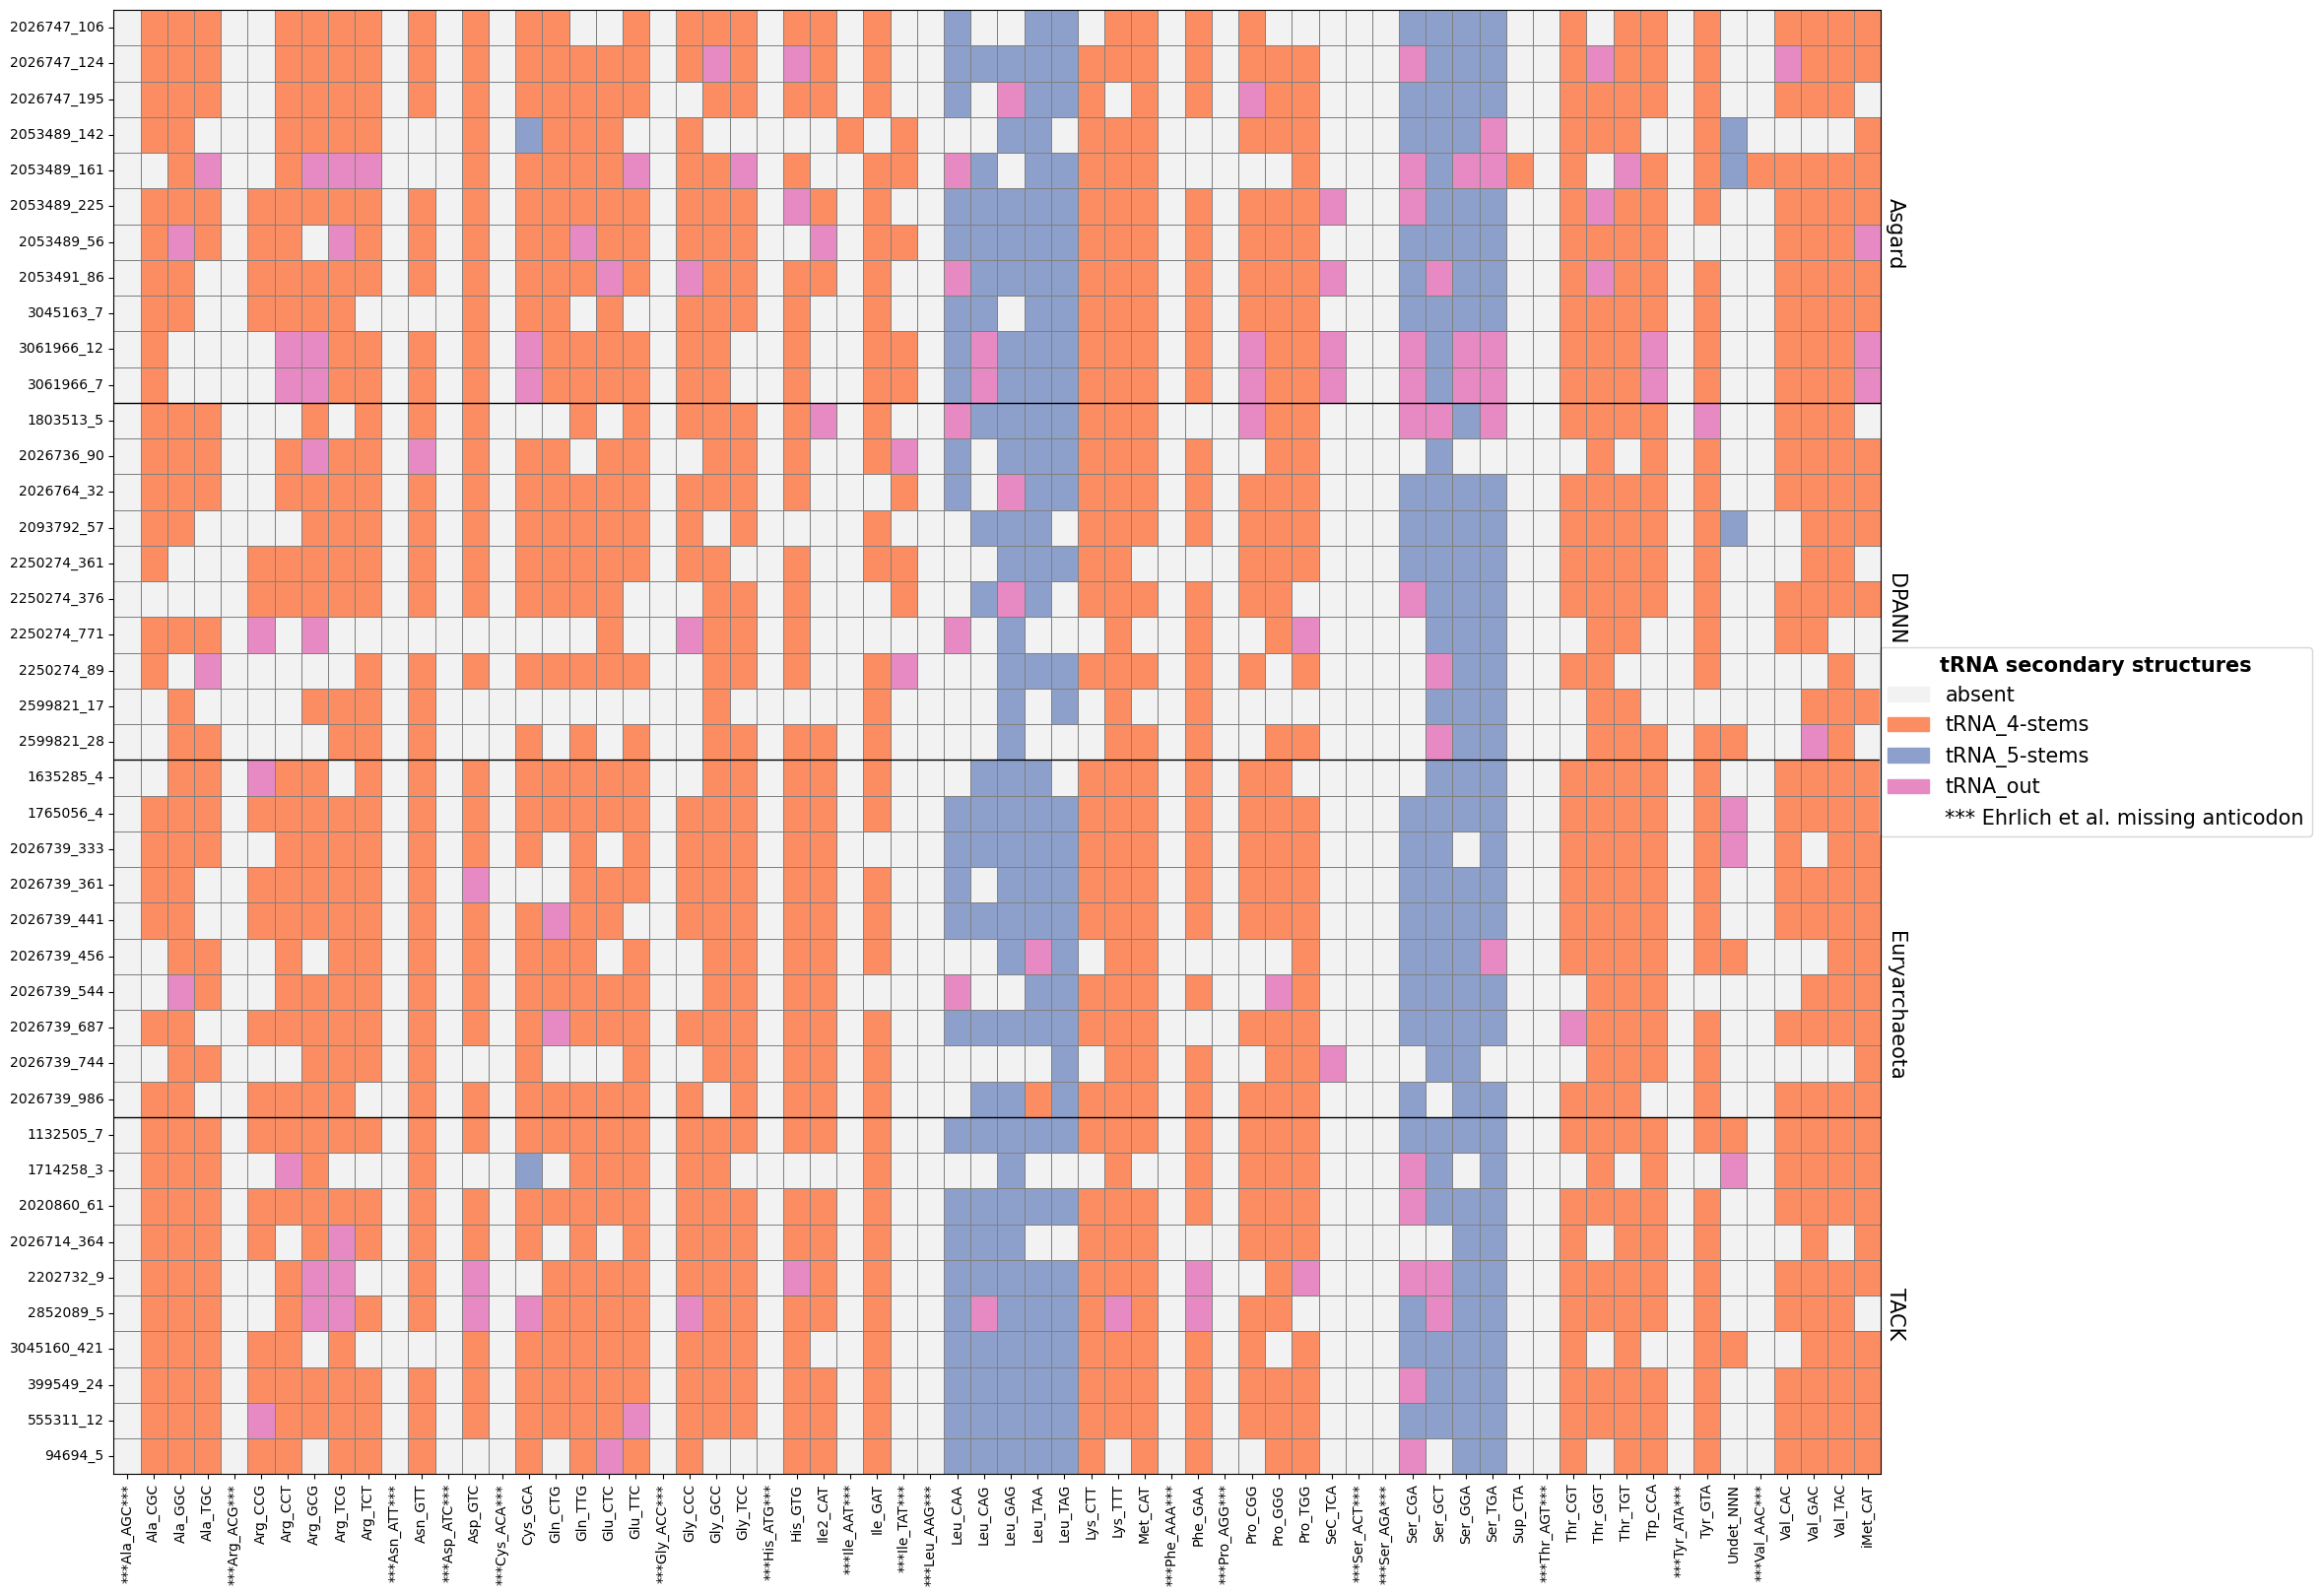

<Figure size 640x480 with 0 Axes>

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Patch

df_matrix_plot = ss_df
df_matrix_plot["type_anticodon"] = ss_df["type"] + "_" + ss_df["anticodon"]

# Prepare y-axis labels (tuples of superphyla and id)
y_tuples = [[row['superphyla'], row['id']] for _, row in df_matrix_plot.groupby(['superphyla', 'id']).first().reset_index().iterrows()]
y_labels_left = [t[1] for t in y_tuples]
y_superphyla = [t[0] for t in y_tuples]

# Prepare x-axis labels (all unique type_anticodon, including missing)
x_labels = sorted(list(set(type_anticodon_unique) | set(missing_type_anticodon)))


# Build the matrix
matrix = []
for superphyla, id in y_tuples:
    row = []
    subset = df_matrix_plot[(df_matrix_plot['superphyla'] == superphyla) & (df_matrix_plot['id'] == id)]
    ta_to_canonical = dict(zip(subset['type_anticodon'], subset['canonical']))
    for ta in x_labels:
        row.append(ta_to_canonical.get(ta, 'absent'))
    matrix.append(row)

matrix = np.array(matrix)
x_labels = ["***"+label+"***" if label in missing_type_anticodon_ehrlich else label for label in x_labels]

# Map canonical types to integers for coloring
canonical_types = sorted(set(df_matrix_plot['canonical']) | {'absent'})
canonical_to_int = {c: i for i, c in enumerate(canonical_types)}
int_matrix = np.vectorize(lambda x: canonical_to_int[x])(matrix)

# Create a color palette, set 'absent' (first or last) to very light grey
palette = sns.color_palette("Set2", len(canonical_types))
absent_idx = canonical_types.index('absent')
palette = list(palette)
palette[absent_idx] = (0.95, 0.95, 0.95)  # very light grey for 'absent'
lut = dict(zip(range(len(canonical_types)), palette))

# Find superphyla block boundaries
superphyla_blocks = []
last_superphyla = None
for idx, sp in enumerate(y_superphyla):
    if sp != last_superphyla:
        superphyla_blocks.append(idx)
        last_superphyla = sp
superphyla_blocks.append(len(y_superphyla))  # add end

# Plot
fig, ax = plt.subplots(figsize=(len(x_labels) * 0.3 + 4, len(y_labels_left) * 0.3 + 4))
sns.heatmap(int_matrix, cmap=palette, cbar=False, linewidths=0.5, linecolor='gray', ax=ax)

# Set x/y ticks and labels
ax.set_xticks(np.arange(len(x_labels)) + 0.5)
ax.set_xticklabels(x_labels, rotation=90)
ax.set_yticks(np.arange(len(y_labels_left)) + 0.5)
ax.set_yticklabels(y_labels_left, rotation=0)

# Add right y-axis for superphyla, only one label per block
superphyla_labels = []
for i in range(len(superphyla_blocks) - 1):
    block_start = superphyla_blocks[i]
    block_end = superphyla_blocks[i+1]
    mid = (block_start + block_end - 1) / 2
    superphyla_labels.append((mid, y_superphyla[block_start]))

ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks([mid + 0.5 for mid, _ in superphyla_labels])
ax2.set_yticklabels([label for _, label in superphyla_labels], rotation=270, fontsize=15,)
ax2.tick_params(axis='y', length=0)
# Add legend
legend_handles = [Patch(color=lut[i], label=ct) for ct, i in canonical_to_int.items()]

# Add a legend entry for Ehrlich missing anticodons
legend_handles.append(Patch(facecolor='none', edgecolor='none', label="*** Ehrlich et al. missing anticodon"))

ax.legend(handles=legend_handles,  loc='center right', bbox_to_anchor=(1.25, 0.5), title='tRNA secondary structures', fontsize=15, title_fontproperties={"weight":"bold", "size": 15})

# Draw dashed lines to separate superphyla blocks
for i in range(1, len(superphyla_blocks) - 1):
    ax.axhline(superphyla_blocks[i], color='black', linewidth=1., )


plt.tight_layout()
plt.show()
#line(superphyla_blocks[i], color='black', linewidth=1., )

# Add legend
legend_handles = [Patch(color=lut[i], label=ct) for ct, i in canonical_to_int.items()]
#ax.legend(handles=legend_handles,  loc='center right', bbox_to_anchor=(1.2, 0.5), title='tRNA secondary structures', fontsize=15, title_fontproperties={"weight":"bold", "size": 15})

fig.suptitle("Presence/Absence of tRNA categories in Archaea genomes")
fig.subplots_adjust(top=0.88)
plt.tight_layout()
plt.show()

### Plot post filtering

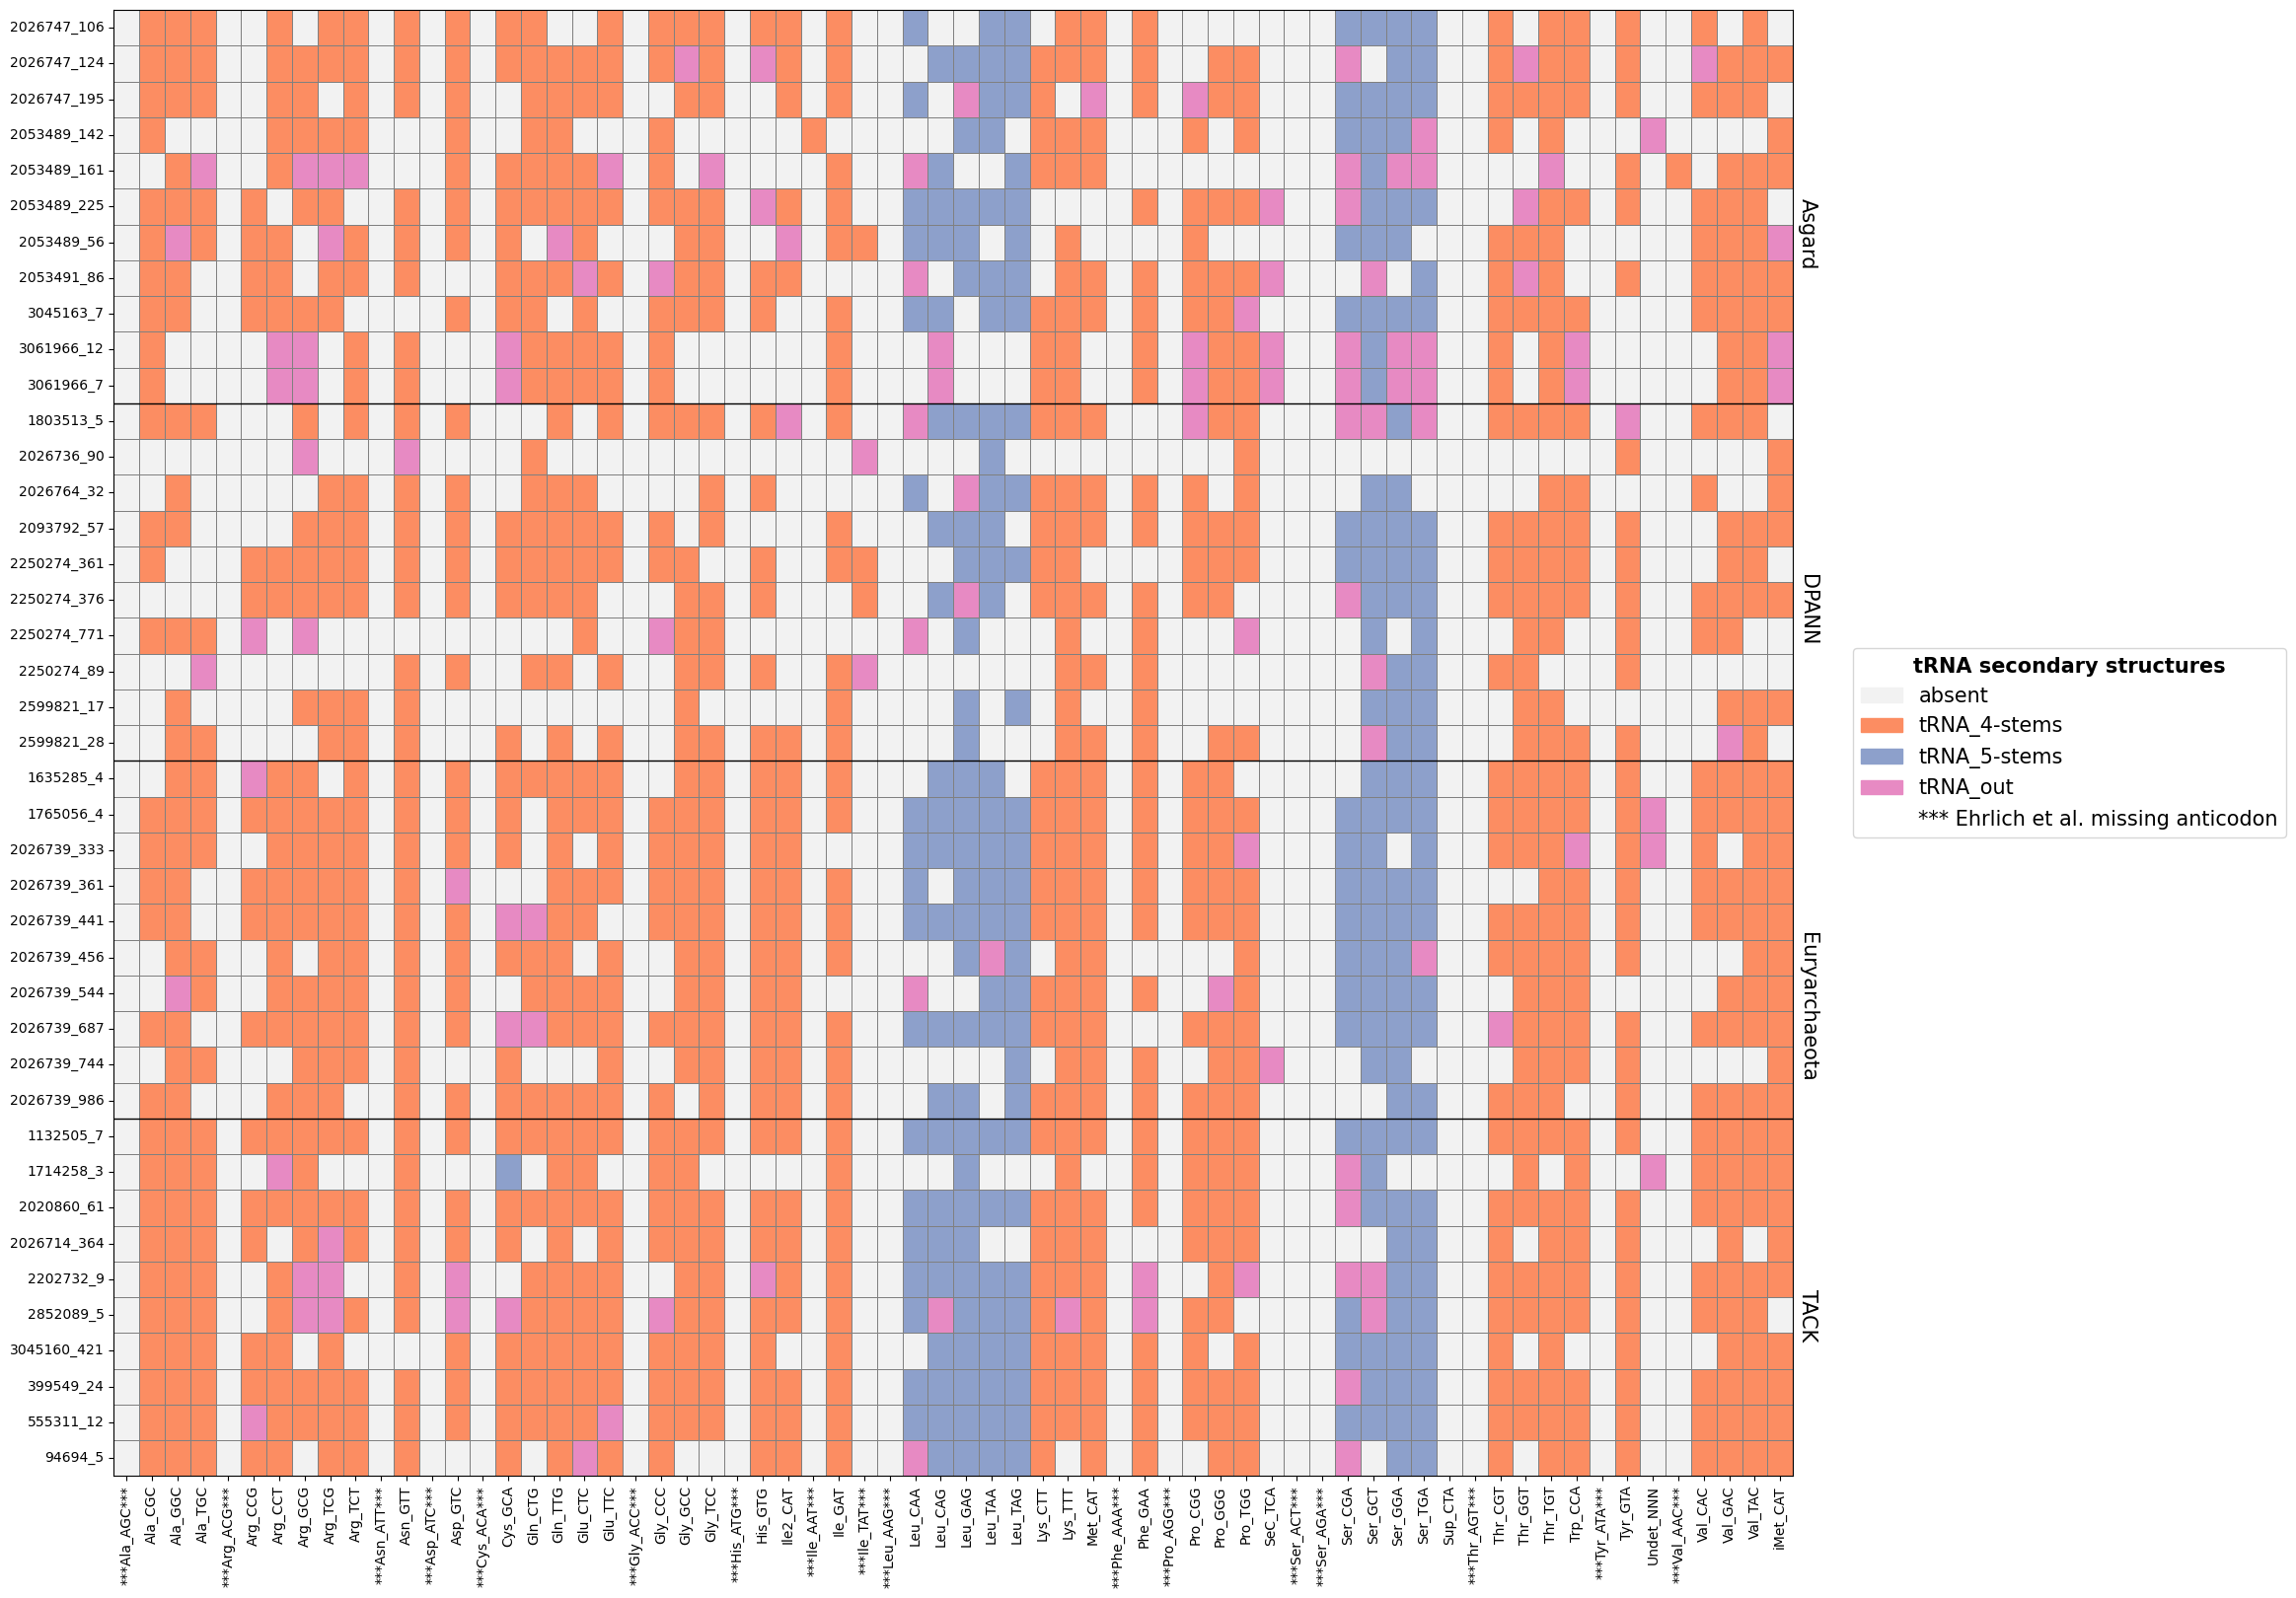

<Figure size 640x480 with 0 Axes>

In [ ]:
df_matrix_plot = pd.read_csv("./data_sets/canonical_tRNAs_after_filtering_for_plot.csv")
df_matrix_plot["type_anticodon"] = df_matrix_plot["type"] + "_" + df_matrix_plot["anticodon"]

# Prepare y-axis labels (tuples of superphyla and id)
y_tuples = [[row['superphyla'], row['id']] for _, row in df_matrix_plot.groupby(['superphyla', 'id']).first().reset_index().iterrows()]
y_labels_left = [t[1] for t in y_tuples]
y_superphyla = [t[0] for t in y_tuples]

# Prepare x-axis labels (all unique type_anticodon, including missing)
x_labels = sorted(list(set(type_anticodon_unique) | set(missing_type_anticodon)))


# Build the matrix
matrix = []
for superphyla, id in y_tuples:
    row = []
    subset = df_matrix_plot[(df_matrix_plot['superphyla'] == superphyla) & (df_matrix_plot['id'] == id)]
    ta_to_canonical = dict(zip(subset['type_anticodon'], subset['canonical']))
    for ta in x_labels:
        row.append(ta_to_canonical.get(ta, 'absent'))
    matrix.append(row)

matrix = np.array(matrix)
x_labels = ["***"+label+"***" if label in missing_type_anticodon_ehrlich else label for label in x_labels]

# Map canonical types to integers for coloring
canonical_types = sorted(set(df_matrix_plot['canonical']) | {'absent'})
canonical_to_int = {c: i for i, c in enumerate(canonical_types)}
int_matrix = np.vectorize(lambda x: canonical_to_int[x])(matrix)

# Create a color palette, set 'absent' (first or last) to very light grey
palette = sns.color_palette("Set2", len(canonical_types))
absent_idx = canonical_types.index('absent')
palette = list(palette)
palette[absent_idx] = (0.95, 0.95, 0.95)  # very light grey for 'absent'
lut = dict(zip(range(len(canonical_types)), palette))

# Find superphyla block boundaries
superphyla_blocks = []
last_superphyla = None
for idx, sp in enumerate(y_superphyla):
    if sp != last_superphyla:
        superphyla_blocks.append(idx)
        last_superphyla = sp
superphyla_blocks.append(len(y_superphyla))  # add end

# Plot
fig, ax = plt.subplots(figsize=(len(x_labels) * 0.3 + 4, len(y_labels_left) * 0.3 + 4))
sns.heatmap(int_matrix, cmap=palette, cbar=False, linewidths=0.5, linecolor='gray', ax=ax)

# Set x/y ticks and labels
ax.set_xticks(np.arange(len(x_labels)) + 0.5)
ax.set_xticklabels(x_labels, rotation=90)
ax.set_yticks(np.arange(len(y_labels_left)) + 0.5)
ax.set_yticklabels(y_labels_left, rotation=0)

# Add right y-axis for superphyla, only one label per block
superphyla_labels = []
for i in range(len(superphyla_blocks) - 1):
    block_start = superphyla_blocks[i]
    block_end = superphyla_blocks[i+1]
    mid = (block_start + block_end - 1) / 2
    superphyla_labels.append((mid, y_superphyla[block_start]))

ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks([mid + 0.5 for mid, _ in superphyla_labels])
ax2.set_yticklabels([label for _, label in superphyla_labels], rotation=270, fontsize=15,)
ax2.tick_params(axis='y', length=0)
# Add legend
legend_handles = [Patch(color=lut[i], label=ct) for ct, i in canonical_to_int.items()]

# Add a legend entry for Ehrlich missing anticodons
legend_handles.append(Patch(facecolor='none', edgecolor='none', label="*** Ehrlich et al. missing anticodon"))

ax.legend(handles=legend_handles,  loc='center right', bbox_to_anchor=(1.30, 0.5), title='tRNA secondary structures', fontsize=15, title_fontproperties={"weight":"bold", "size": 15})

# Draw dashed lines to separate superphyla blocks
for i in range(1, len(superphyla_blocks) - 1):
    ax.axhline(superphyla_blocks[i], color='black', linewidth=1., )


plt.tight_layout()
plt.show()
#line(superphyla_blocks[i], color='black', linewidth=1., )

# Add legend
legend_handles = [Patch(color=lut[i], label=ct) for ct, i in canonical_to_int.items()]
#ax.legend(handles=legend_handles,  loc='center right', bbox_to_anchor=(1.2, 0.5), title='tRNA secondary structures', fontsize=15, title_fontproperties={"weight":"bold", "size": 15})

fig.suptitle("Presence/Absence of tRNA categories in Archaea genomes")
fig.subplots_adjust(top=0.88)
plt.tight_layout()
plt.show()

### After filtering

Absent in Archaea by Ehrlich et al.

in all
- Ser_ACT
- Gly_ACC
- Phe_AAA
- Asn_ATT
- Asp_ATC
- His_ATG
- Cys_ACA
- Tyr-ATA

in Bactera and Archaea
- Leu_AAG
- Ser_AGA
- Ala_AGC
- Pro_AGG
- Val_AAC
- Thr_AGT
- Ile_AAT
- Ile_TAT
  
only in Archaea
- Arg_ACG

# Filter recovered again

In [ ]:
# size filtering
df_refolded = pd.read_csv("./results/refolding/refolded.csv")
df_refolded_filtered = df_refolded[df_refolded["canonical_refolded"].isin(["tRNA_4-stems", "tRNA_5-stems"])]
df_refolded_filtered = df_refolded_filtered[df_refolded_filtered["seq"].str.len() < 106]

# filter out pseudogenes
trnascan_df = extract_tRNAscan_file("./")
trnascan_df_filtered = trnascan_df[trnascan_df["note"].str.contains("pseudo", case=False, na=False) == False]

# # combine data frames
df_merged_refolded = pd.merge(
    df_refolded_filtered,
    trnascan_df,
    on=["superphyla", "id", "name"],
    how="inner"
)
df_merged_refolded

,Unnamed: 0,superphyla,id,name,seq,refolded_sec_struct,tRNA_structure_abstracted_refolded,stem_count_refolded,canonical_refolded,trna_begin,...,trna_type,anticodon,intron_begin,intron_end,inf_score,hmm_score,two_str_score,isotype_cm,isotype_score,note
0,0,Asgard,3045163_7,JASEJC010000005.trna5,GGGGCAUUGGUGUAAUGGUAGCACCCCUGGUCUGGCACCuAGGAGG...,(((((....((((.......)))).(((((........)))))..(...,(.(.).(.).(.)).,4,tRNA_4-stems,32768,...,Pro,TGG,0,0,22.3,11.70,10.60,Gly,14.8,IPD:-12.00
1,117,Asgard,3045163_7,JASEJC010000005.trna5,GGGGCAUUGGUGUAAUGGUAGCACCCCUGGUCUGGCACCuAGGAGG...,(((((....((((.......)))).(((((........)))))..(...,(.(.).(.).(.)).,4,tRNA_4-stems,32768,...,Pro,TGG,0,0,22.3,11.70,10.60,Gly,14.8,IPD:-12.00
2,234,Asgard,3045163_7,JASEJC010000005.trna5,GGGGCAUUGGUGUAAUGGUAGCACCCCUGGUCUGGCACCuAGGAGG...,(((((....((((.......)))).(((((........)))))..(...,(.(.).(.).(.)).,4,tRNA_4-stems,32768,...,Pro,TGG,0,0,22.3,11.70,10.60,Gly,14.8,IPD:-12.00
3,39,DPANN,2250274_771,DAHXDH010000004.trna1,GGGGAGUUACGCUAACCuGGCAGACUUCCAGCCUUGGGCGCUGGAU...,(((((((...((((...))))......(((((.......))))).....,(.(.).(.).(.)).,4,tRNA_4-stems,13117,...,Pro,TGG,0,0,41.3,29.20,12.10,Pro,39.0,
4,156,DPANN,2250274_771,DAHXDH010000004.trna1,GGGGAGUUACGCUAACCuGGCAGACUUCCAGCCUUGGGCGCUGGAU...,(((((((...((((...))))......(((((.......))))).....,(.(.).(.).(.)).,4,tRNA_4-stems,13117,...,Pro,TGG,0,0,41.3,29.20,12.10,Pro,39.0,
5,274,DPANN,2250274_771,DAHXDH010000004.trna1,GGGGAGUUACGCUAACCuGGCAGACUUCCAGCCUUGGGCGCUGGAU...,(((((((...((((...))))......(((((.......))))).....,(.(.).(.).(.)).,4,tRNA_4-stems,13117,...,Pro,TGG,0,0,41.3,29.20,12.10,Pro,39.0,


In [ ]:
df_refolded

,Unnamed: 0,superphyla,id,name,seq,refolded_sec_struct,tRNA_structure_abstracted_refolded,stem_count_refolded,canonical_refolded
0,0,Asgard,3045163_7,JASEJC010000005.trna5,GGGGCAUUGGUGUAAUGGUAGCACCCCUGGUCUGGCACCuAGGAGG...,(((((....((((.......)))).(((((........)))))..(...,(.(.).(.).(.)).,4,tRNA_4-stems
1,1,Euryarchaeota,2026739_441,JAENZL010000013.trna4,GCCAAGAUGGCGGAGCGGCUACGCAAUCGCCUGCAGAGCGAUACCa...,((((((((.((...(((((.........))).))...)).)).......,(.(.(..).)..(.).).,4,tRNA_out
2,2,Euryarchaeota,2026739_441,JAENZL010000028.trna1,AGCCCGGUAGUGUAGUGGUcaAUCAUGCGGGACUCUGACUCCCGCA...,((((((((.................(((((((.......)))))))...,(.(.).(.).).,3,tRNA_out
3,3,Asgard,2053489_161,JAGXOA010000009.trna3,GCAGGUGUAGCCUAGCUGGUAAGACGCUGGCCUUGAGAGCCUGUGC...,(((((((..(((.(((.(......))))))).(((((..((((.((...,(.(.(.(.))).(.(.(.).).).).,7,tRNA_out
4,4,Asgard,2053489_161,JAGXOA010000027.trna3,GCGGGAAUGGCUGAGUGGUaAAAGCAAUAGAUUCAAAAUCUAUCCU...,((((((...(((..........))).(((((((...)))))))(((...,(.(.).(.)(.).(.).).,5,tRNA_out
...,...,...,...,...,...,...,...,...,...
347,347,TACK,2026714_364,JAGTQX010000003.trna11,GGGCCCGUAGCCCAGUAcGGAucAAGGCGCCGGCCUUCGGAGCCGG...,((((((...(((..(.......)..))).((((((....).)))))...,(.(.(.).).(..).(.).).,5,tRNA_out
348,348,Asgard,2053491_86,JAGXKG010000001.trna9,GCUGGGAUCUCCUAGCCuGGUAUGGAGCCAGCCUGCUAAGCUGGUG...,(((((((..(((...........)))((((((.......))))))(...,(.(.)(.)(.).(.)).,5,tRNA_out
349,349,Asgard,2053491_86,JAGXKG010000001.trna14,GCGGCCGUGGUCUAGCAUGGUUAGGACUGAAGCUUCCCAAGCUUCC...,((((((((.(........((...((((((((((((...)))))))....,(.(.(.(..).)).).,4,tRNA_out
350,350,Asgard,2053491_86,JAGXKG010000001.trna21,GCCGAGGUAGCCAAGCCcGGCcaACGGCGACGGACUCAAGAUCCGU...,(((((((..(((......)))..((((.(((((.........))))...,(.(.).(.(.).).(.).).,5,tRNA_out


In [ ]:
# Determine loop lengths
stem_count_values = df_merged_refolded["stem_count_refolded"].values
dot_brackt_sec_str_values = df_merged_refolded["refolded_sec_struct"].values

d_loop_length = []
ac_loop_length = []
v_loop_length = []
t_loop_length = []

for idx, value in enumerate(dot_brackt_sec_str_values):
    
    match stem_count_values[idx]:
        
        case 4:
        
            d_loop, ac_loop, t_loop  = find_loop_dots(value)
            d_loop_length.append(d_loop.count("."))
            ac_loop_length.append(ac_loop.count("."))
            t_loop_length.append(t_loop.count("."))
            v_loop_length.append(None)
        
        case 5:
        
            d_loop, ac_loop, v_loop, t_loop  = find_loop_dots(value)
            d_loop_length.append(d_loop.count("."))
            ac_loop_length.append(ac_loop.count("."))
            t_loop_length.append(t_loop.count("."))
            v_loop_length.append(v_loop.count("."))
        
df_merged_refolded["d_loop_length"] = d_loop_length
df_merged_refolded["ac_loop_length"] = ac_loop_length
df_merged_refolded["t_loop_length"] = t_loop_length
df_merged_refolded["v_loop_length"] = v_loop_length

In [ ]:
# Continue filtering
df_merged_refolded_filtered = df_merged_refolded[
    (df_merged["ac_loop_length"] > 6) &
    (df_merged["ac_loop_length"] < 15) &
    (df_merged["d_loop_length"] < 21) &
    (df_merged["t_loop_length"] < 11) &
    ((df_merged["v_loop_length"].isna()) | (df_merged["v_loop_length"] < 7)) &
    (df_merged["isotype_score"] >= 60) 
    # (df_merged["seq"].str.endswith("CCA"))       
]

df_merged_refolded_filtered

/tmp/ipykernel_6074/1187455633.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_merged_refolded_filtered = df_merged_refolded[


,superphyla,id,name,seq,refolded_sec_struct,tRNA_structure_abstracted_refolded,stem_count_refolded,canonical_refolded,trna_begin,trna_end,...,inf_score,hmm_score,two_str_score,isotype_cm,isotype_score,note,d_loop_length,ac_loop_length,t_loop_length,v_loop_length
0,Asgard,3045163_7,JASEJC010000005.trna5,GGGGCAUUGGUGUAAUGGUAGCACCCCUGGUCUGGCACCuAGGAGG...,(((((....((((.......)))).(((((........)))))..(...,(.(.).(.).(.)).,4,tRNA_4-stems,32768,32697,...,22.3,11.70,10.60,Gly,14.8,IPD:-12.00,7,8,7,None
1,Asgard,3045163_7,JASEJC010000005.trna5,GGGGCAUUGGUGUAAUGGUAGCACCCCUGGUCUGGCACCuAGGAGG...,(((((....((((.......)))).(((((........)))))..(...,(.(.).(.).(.)).,4,tRNA_4-stems,32768,32697,...,22.3,11.70,10.60,Gly,14.8,IPD:-12.00,7,8,7,None
2,Asgard,3045163_7,JASEJC010000005.trna5,GGGGCAUUGGUGUAAUGGUAGCACCCCUGGUCUGGCACCuAGGAGG...,(((((....((((.......)))).(((((........)))))..(...,(.(.).(.).(.)).,4,tRNA_4-stems,32768,32697,...,22.3,11.70,10.60,Gly,14.8,IPD:-12.00,7,8,7,None
3,DPANN,2250274_771,DAHXDH010000004.trna1,GGGGAGUUACGCUAACCuGGCAGACUUCCAGCCUUGGGCGCUGGAU...,(((((((...((((...))))......(((((.......))))).....,(.(.).(.).(.)).,4,tRNA_4-stems,13117,13189,...,41.3,29.20,12.10,Pro,39.0,,3,7,7,None
4,DPANN,2250274_771,DAHXDH010000004.trna1,GGGGAGUUACGCUAACCuGGCAGACUUCCAGCCUUGGGCGCUGGAU...,(((((((...((((...))))......(((((.......))))).....,(.(.).(.).(.)).,4,tRNA_4-stems,13117,13189,...,41.3,29.20,12.10,Pro,39.0,,3,7,7,None
5,DPANN,2250274_771,DAHXDH010000004.trna1,GGGGAGUUACGCUAACCuGGCAGACUUCCAGCCUUGGGCGCUGGAU...,(((((((...((((...))))......(((((.......))))).....,(.(.).(.).(.)).,4,tRNA_4-stems,13117,13189,...,41.3,29.20,12.10,Pro,39.0,,3,7,7,None


In [ ]:
df_merged_refolded_filtered= df_merged_refolded_filtered.drop_duplicates(subset=["superphyla", "name", "id"])

## Merge

In [ ]:
# Per anticodon

fasta_file_path = "./results/refolding/"
anticodon_unique = df_merged_filtered["anticodon_y"].unique()

for anticodon in anticodon_unique:
    filtered = df_merged_filtered[df_merged_filtered["anticodon_x"] == anticodon]
    
    with open(f"{fasta_file_path}{anticodon}_included_recovered_fullconst.fasta", mode="w") as fasta:
        fasta.writelines(
            f">{superphyla}__{id}__{aa}_{anticodon}__{name}__{length}bp__{score}\n{seq}\n{struct} #FS\n"
            for superphyla, id, aa, anticodon, name, length, score, seq, struct in zip(filtered["superphyla"], 
                                                                filtered["id"], 
                                                                filtered["type"],
                                                                filtered["anticodon_x"],
                                                                filtered["name"],
                                                                filtered["length"],
                                                                filtered["isotype_score"],
                                                                filtered["seq"],
                                                                filtered["dot_bracket_sec_str"]
                                                                )
        )

In [ ]:
# Append mode
anticodon_unique = df_merged_refolded_filtered["anticodon"].unique()
for anticodon in anticodon_unique:
    filtered = df_merged_refolded_filtered[df_merged_refolded_filtered["anticodon"] == anticodon]
    
    with open(f"{fasta_file_path}{anticodon}_included_recovered_fullconst.fasta", mode="a") as fasta:
        
        fasta.writelines(
            f">{superphyla}__{id}__{aa}_{anticodon}__{name}__{len(seq)}bp__{score}_recovered_fullconst\n{seq}\n{struct} #FS\n"
            for superphyla, id, aa, anticodon, name, score, seq, struct in zip(filtered["superphyla"], 
                                                                filtered["id"], 
                                                                filtered["trna_type"],
                                                                filtered["anticodon"],
                                                                filtered["name"],
                                                                # filtered["length"],
                                                                filtered["isotype_score"],
                                                                filtered["seq"],
                                                                filtered["refolded_sec_struct"]
                                                                )
        )